In [ ]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt

from src.utils import *
from src.ising_model import *

from src.PFs_qcircs import*
from src.CPFs_qcircs import*
from average_infidelity_qcircs import *
from src.ising_model_qcircs import *

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.circuit.library import UnitaryOverlap

import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')

plt.rcParams['text.usetex'] = True # TeX rendering
plt.rcParams.update({
    "font.family": "serif",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":12})          # specify font size here

## System specification

In [5]:
pparam = 0.1
n, J, h = 2, pparam, 1
H, Hxx, Hz = ising_qubit_hamiltonian(n, J, h)
A, B = Hz, Hxx

tau = 0.1 # some evolution time

seed = 47 # some fixed seed used for qiskit transpiler

# Quantum Circuits

In [7]:
# quantum circuit for exact evolution
exactU = exact_evolution_ising_qcirc(J, h, n, tau)

# quantum circutis for approximations usings PFs and CPFs
UPF1r1 = PF_qcirc(1, A, B, tau, ppart='Hxx', reps=1)
UPF1r10 = PF_qcirc(1, A, B, tau, ppart='Hxx', reps=10)

UPF2r1 = PF_qcirc(2, A, B, tau, ppart='Hxx', reps=1)
UPF2r10 = PF_qcirc(2, A, B, tau, ppart='Hxx', reps=10)

UCPF1r1 = CPF_symp_qcirc(1, A, B, tau, ppart='Hxx', reps=1)
UCPF1r10 = CPF_symp_qcirc(1, A, B, tau, ppart='Hxx', reps=10)

UCPF2r1 = CPF_symp_qcirc(2, A, B, tau, ppart='Hxx', reps=1)
UCPF2r10 = CPF_symp_qcirc(2, A, B, tau, ppart='Hxx', reps=10)

# Overlap circuits
overlap_UPF1r1 = UnitaryOverlap(UPF1r1, exactU)
overlap_UPF1r10 = UnitaryOverlap(UPF1r10, exactU)

overlap_UPF2r1 = UnitaryOverlap(UPF2r1, exactU)
overlap_UPF2r10 = UnitaryOverlap(UPF2r10, exactU)

overlap_UCPF1r1 = UnitaryOverlap(UCPF1r1, exactU)
overlap_UCPF1r10 = UnitaryOverlap(UCPF1r10, exactU)

overlap_UCPF2r1 = UnitaryOverlap(UCPF2r1, exactU)
overlap_UCPF2r10 = UnitaryOverlap(UCPF2r10, exactU)

In [8]:
print(f"""
Depth for non-transpiled exactU: {exactU.decompose().depth()}
Depth for non-transpiled UPF1r1: {UPF1r1.decompose().depth()}
Depth for non-transpiled UPF1r10: {UPF1r10.decompose().depth()}
Depth for non-transpiled UPF2r1: {UPF2r1.decompose().depth()}
Depth for non-transpiled UPF2r10: {UPF2r10.decompose().depth()}
Depth for non-transpiled UCPF1r1: {UCPF1r1.decompose().depth()}
Depth for non-transpiled UCPF1r10: {UCPF1r10.decompose().depth()}
Depth for non-transpiled UCPF2r1: {UCPF2r1.decompose().depth()}
Depth for non-transpiled UCPF2r10: {UCPF2r10.decompose().depth()}
"""
)

print(f"""
Overlap depth for non-transpiled UPF1r1: {overlap_UPF1r1.decompose().depth()}
Overlap depth for non-transpiled UPF1r10: {overlap_UPF1r10.decompose().depth()}
Overlap depth for non-transpiled UPF2r1: {overlap_UPF2r1.decompose().depth()}
Overlap depth for non-transpiled UPF2r10: {overlap_UPF2r10.decompose().depth()}
Overlap depth for non-transpiled UCPF1r1: {overlap_UCPF1r1.decompose().depth()}
Overlap depth for non-transpiled UCPF1r10: {overlap_UCPF1r10.decompose().depth()}
Overlap depth for non-transpiled UCPF2r1: {overlap_UCPF2r1.decompose().depth()}
Overlap depth for non-transpiled UCPF2r10: {overlap_UCPF2r10.decompose().depth()}
"""
)


Depth for non-transpiled exactU: 23
Depth for non-transpiled UPF1r1: 4
Depth for non-transpiled UPF1r10: 40
Depth for non-transpiled UPF2r1: 5
Depth for non-transpiled UPF2r10: 41
Depth for non-transpiled UCPF1r1: 34
Depth for non-transpiled UCPF1r10: 70
Depth for non-transpiled UCPF2r1: 29
Depth for non-transpiled UCPF2r10: 65


Overlap depth for non-transpiled UPF1r1: 27
Overlap depth for non-transpiled UPF1r10: 63
Overlap depth for non-transpiled UPF2r1: 28
Overlap depth for non-transpiled UPF2r10: 64
Overlap depth for non-transpiled UCPF1r1: 57
Overlap depth for non-transpiled UCPF1r10: 93
Overlap depth for non-transpiled UCPF2r1: 52
Overlap depth for non-transpiled UCPF2r10: 88



## Visualization for non-transpiled circuits

57


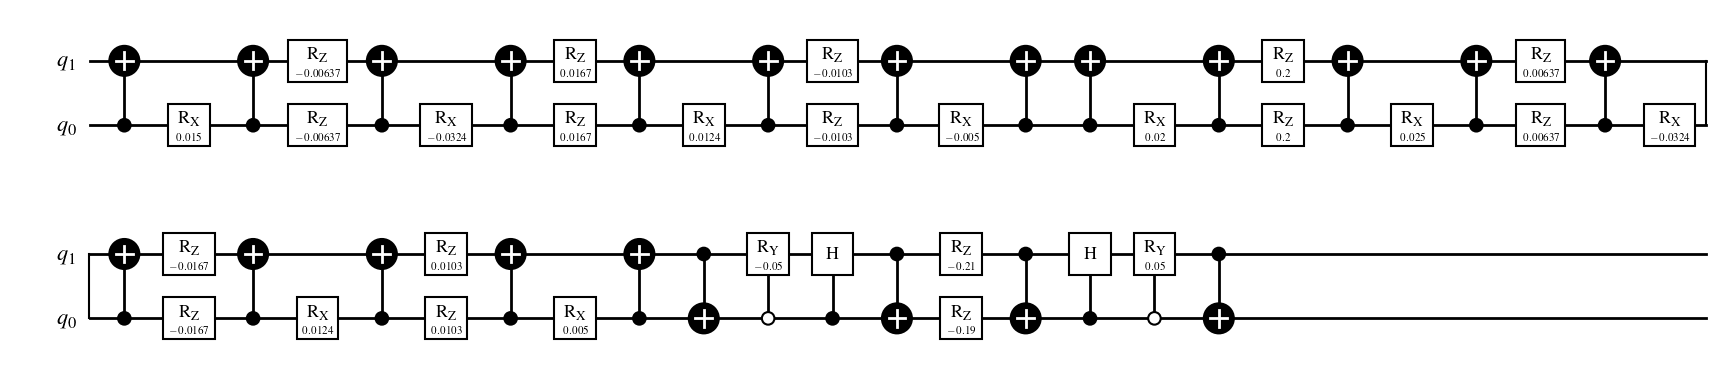

In [9]:
print(overlap_UCPF1r1.decompose().depth())
# Draw excluding idle qubits from the diagram
overlap_UCPF1r1.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw")

23


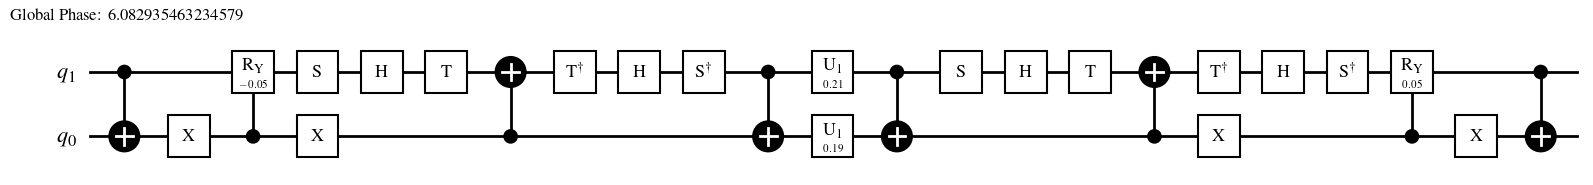

In [18]:
print(exactU.decompose().depth())
# Draw excluding idle qubits from the diagram
exactU.decompose().draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw")

4


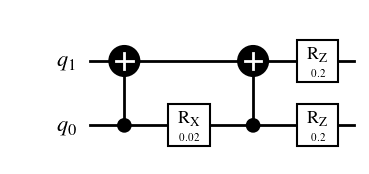

In [149]:
print(UPF1r1.depth())
# Draw excluding idle qubits from the diagram
UPF1r1.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw")

40


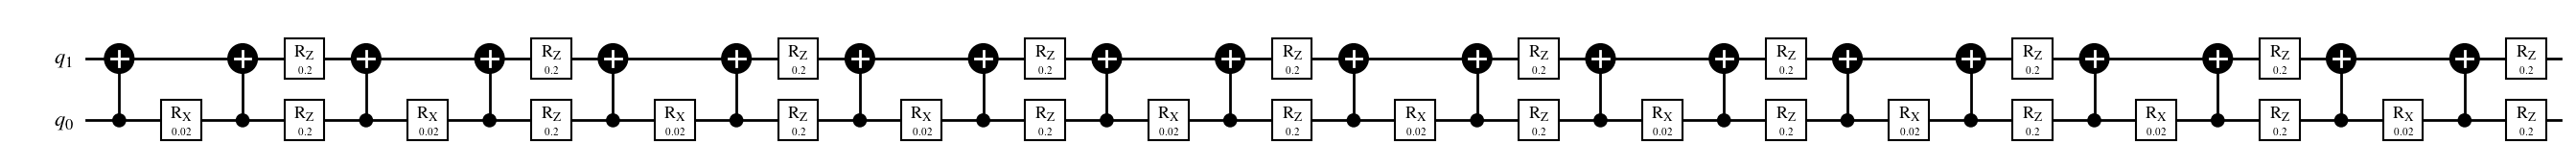

In [150]:
print(UPF1r10.depth())
# Draw excluding idle qubits from the diagram
UPF1r10.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw", fold=-1)

5


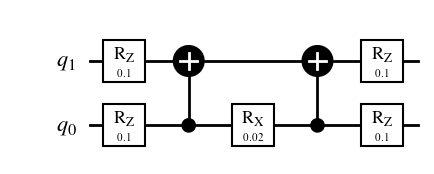

In [151]:
print(UPF2r1.depth())
# Draw excluding idle qubits from the diagram
UPF2r1.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw")

41


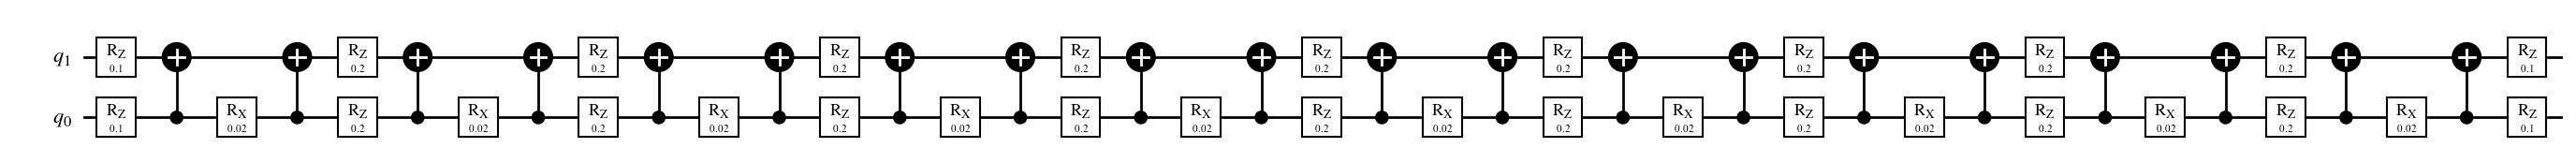

In [152]:
print(UPF2r10.depth())
# Draw excluding idle qubits from the diagram
UPF2r10.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw", fold=-1)

34


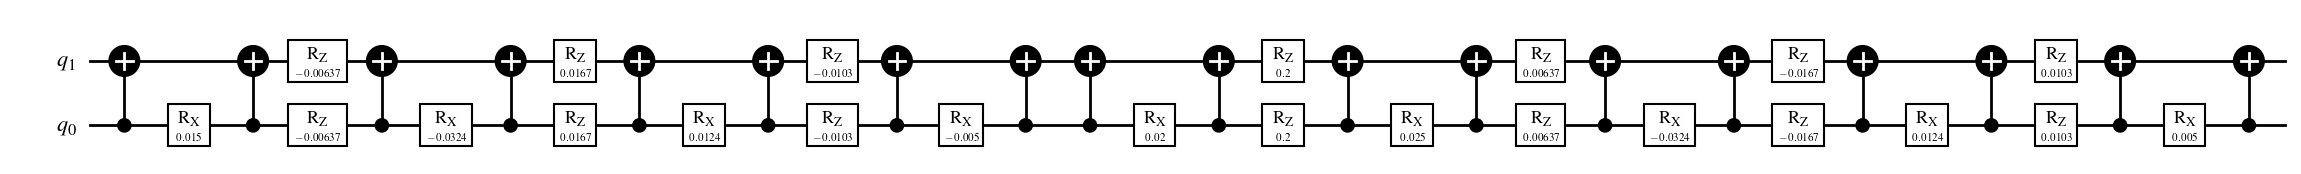

In [153]:
print(UCPF1r1.depth())
# Draw excluding idle qubits from the diagram
UCPF1r1.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw", fold=-1)

70


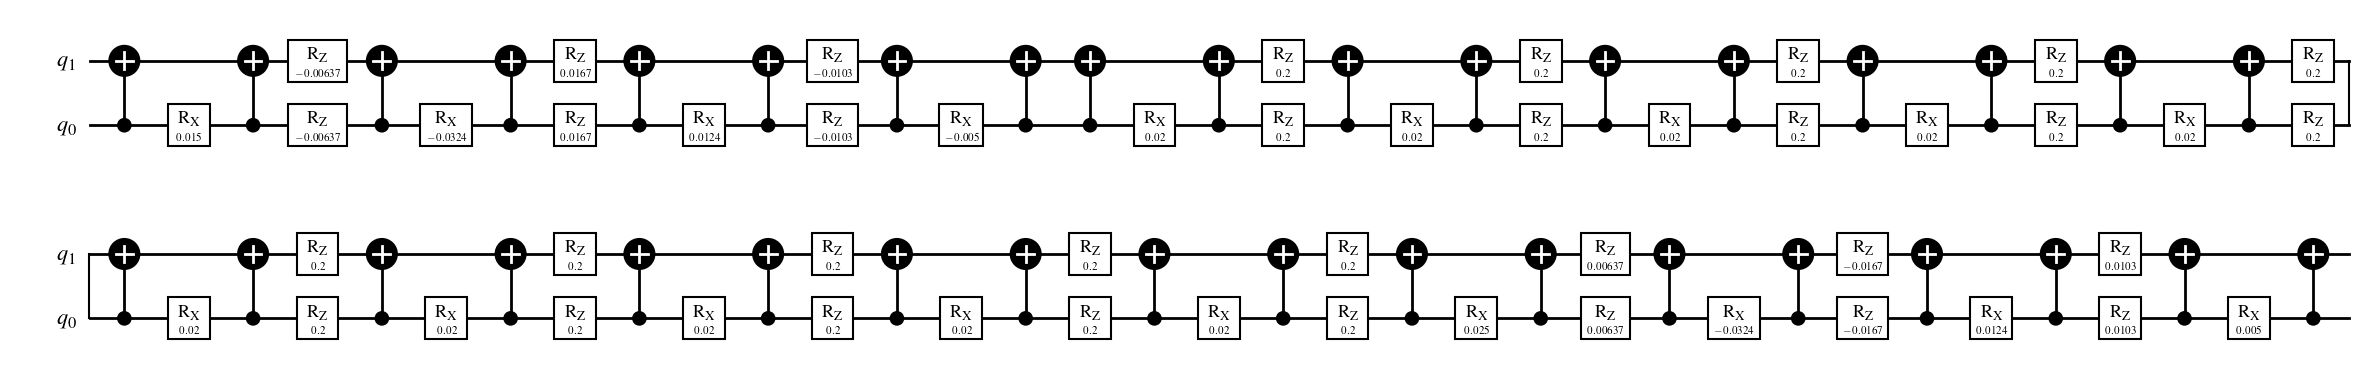

In [154]:
print(UCPF1r10.depth())
# Draw excluding idle qubits from the diagram
UCPF1r10.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw", fold=35)

29


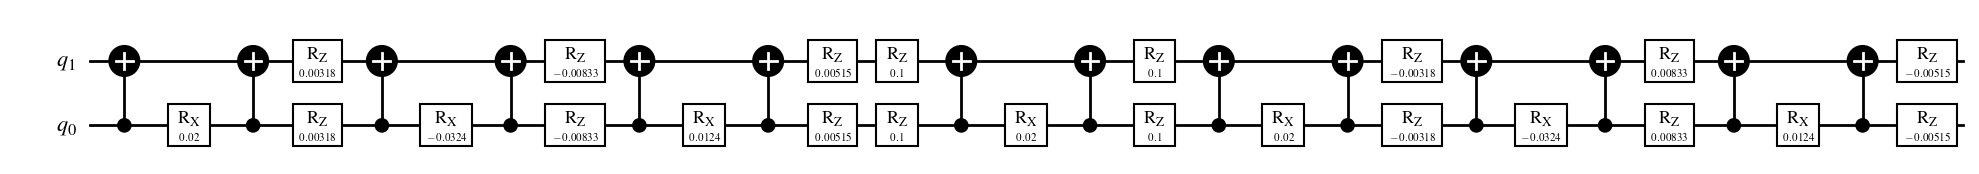

In [155]:
print(UCPF2r1.depth())
# Draw excluding idle qubits from the diagram
UCPF2r1.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw", fold=-1)

65


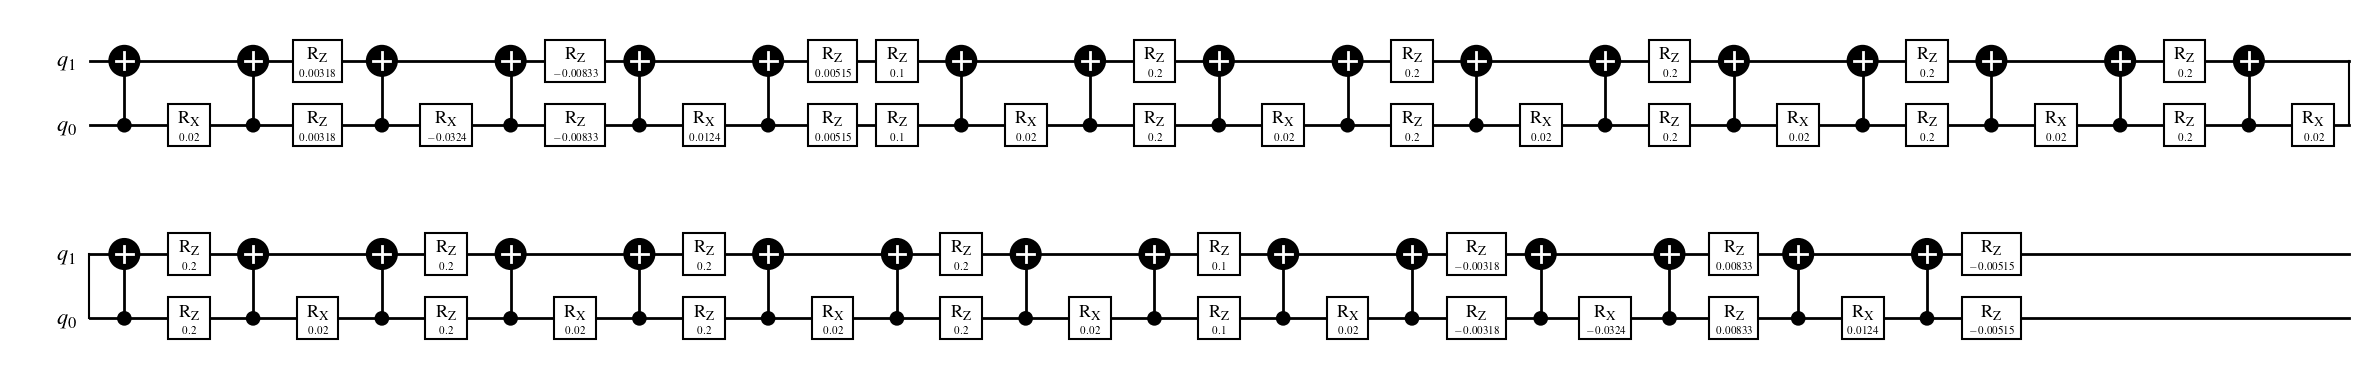

In [156]:
print(UCPF2r10.depth())
# Draw excluding idle qubits from the diagram
UCPF2r10.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw", fold=35)

# Depth comparison for transpiled circuits

In the following, we will use pass manager with various optimization levels. We will use Level-1 and Level-3 pass managers. The circuit depth depends on the optimization level.

The Level-1 pass manager provides a light optimization by simple adjacent gate collapsing.

The Level-3 pass manager provides a heavy optimization by noise adaptive qubit mapping and gate cancellation using commutativity rules and unitary synthesis.

See [Preset Passmanagers](https://docs.quantum.ibm.com/api/qiskit/transpiler_preset) for details.

## Depth comparison for level-1 pass manager

In [26]:
service = QiskitRuntimeService()
backend = service.backend("ibm_quebec")
pm = generate_preset_pass_manager(backend=backend,seed_transpiler=seed , optimization_level=1)

In [27]:
transpiled_exactU = pm.run(exactU)

transpiled_UPF1r1 = pm.run(UPF1r1)
transpiled_UPF1r10 = pm.run(UPF1r10)

transpiled_UPF2r1 = pm.run(UPF2r1)
transpiled_UPF2r10 = pm.run(UPF2r10)

transpiled_UCPF1r1 = pm.run(UCPF1r1)
transpiled_UCPF1r10 = pm.run(UCPF1r10)

transpiled_UCPF2r1 = pm.run(UCPF2r1)
transpiled_UCPF2r10 = pm.run(UCPF2r10)


transpiled_overlap_UPF1r1 = pm.run(overlap_UPF1r1)
transpiled_overlap_UPF1r10 = pm.run(overlap_UPF1r10)

transpiled_overlap_UPF2r1 = pm.run(overlap_UPF2r1)
transpiled_overlap_UPF2r10 = pm.run(overlap_UPF2r10)


transpiled_overlap_UCPF1r1 = pm.run(overlap_UCPF1r1)
transpiled_overlap_UCPF1r10 = pm.run(overlap_UCPF1r10)

transpiled_overlap_UCPF2r1 = pm.run(overlap_UCPF2r1)
transpiled_overlap_UCPF2r10 = pm.run(overlap_UCPF2r10)

In [28]:
print(f"""
Depth for level-1 transpiled exactU: {transpiled_exactU.depth()}
Depth for level-1 transpiled UPF1r1: {transpiled_UPF1r1.depth()}
Depth for level-1 transpiled UPF1r10: {transpiled_UPF1r10.depth()}
Depth for level-1 transpiled UPF2r1: {transpiled_UPF2r1.depth()}
Depth for level-1 transpiled UPF2r10: {transpiled_UPF2r10.depth()}
Depth for level-1 transpiled UCPF1r1: {transpiled_UCPF1r1.depth()}
Depth for level-1 transpiled UCPF1r10: {transpiled_UCPF1r10.depth()}
Depth for level-1 transpiled UCPF2r1: {transpiled_UCPF2r1.depth()}
Depth for level-1 transpiled UCPF2r10: {transpiled_UCPF2r10.depth()}
"""
)

print(f"""
Overlap depth for level-1 transpiled UPF1r1: {transpiled_overlap_UPF1r1.depth()}
Overlap depth for level-1 transpiled UPF1r10: {transpiled_overlap_UPF1r10.depth()}
Overlap depth for level-1 transpiled UPF2r1: {transpiled_overlap_UPF2r1.depth()}
Overlap depth for level-1 transpiled UPF2r10: {transpiled_overlap_UPF2r10.depth()}
Overlap depth for level-1 transpiled UCPF1r1: {transpiled_overlap_UCPF1r1.depth()}
Overlap depth for level-1 transpiled UCPF1r10: {transpiled_overlap_UCPF1r10.depth()}
Overlap depth for level-1 transpiled UCPF2r1: {transpiled_overlap_UCPF2r1.depth()}
Overlap depth for level-1 transpiled UCPF2r10: {transpiled_overlap_UCPF2r10.depth()}
"""
)


Depth for level-1 transpiled exactU: 49
Depth for level-1 transpiled UPF1r1: 10
Depth for level-1 transpiled UPF1r10: 91
Depth for level-1 transpiled UPF2r1: 10
Depth for level-1 transpiled UPF2r10: 91
Depth for level-1 transpiled UCPF1r1: 73
Depth for level-1 transpiled UCPF1r10: 154
Depth for level-1 transpiled UCPF2r1: 64
Depth for level-1 transpiled UCPF2r10: 145


Overlap depth for level-1 transpiled UPF1r1: 57
Overlap depth for level-1 transpiled UPF1r10: 138
Overlap depth for level-1 transpiled UPF2r1: 57
Overlap depth for level-1 transpiled UPF2r10: 138
Overlap depth for level-1 transpiled UCPF1r1: 119
Overlap depth for level-1 transpiled UCPF1r10: 200
Overlap depth for level-1 transpiled UCPF2r1: 111
Overlap depth for level-1 transpiled UCPF2r10: 192



## Visualization for level-1 circuits

200


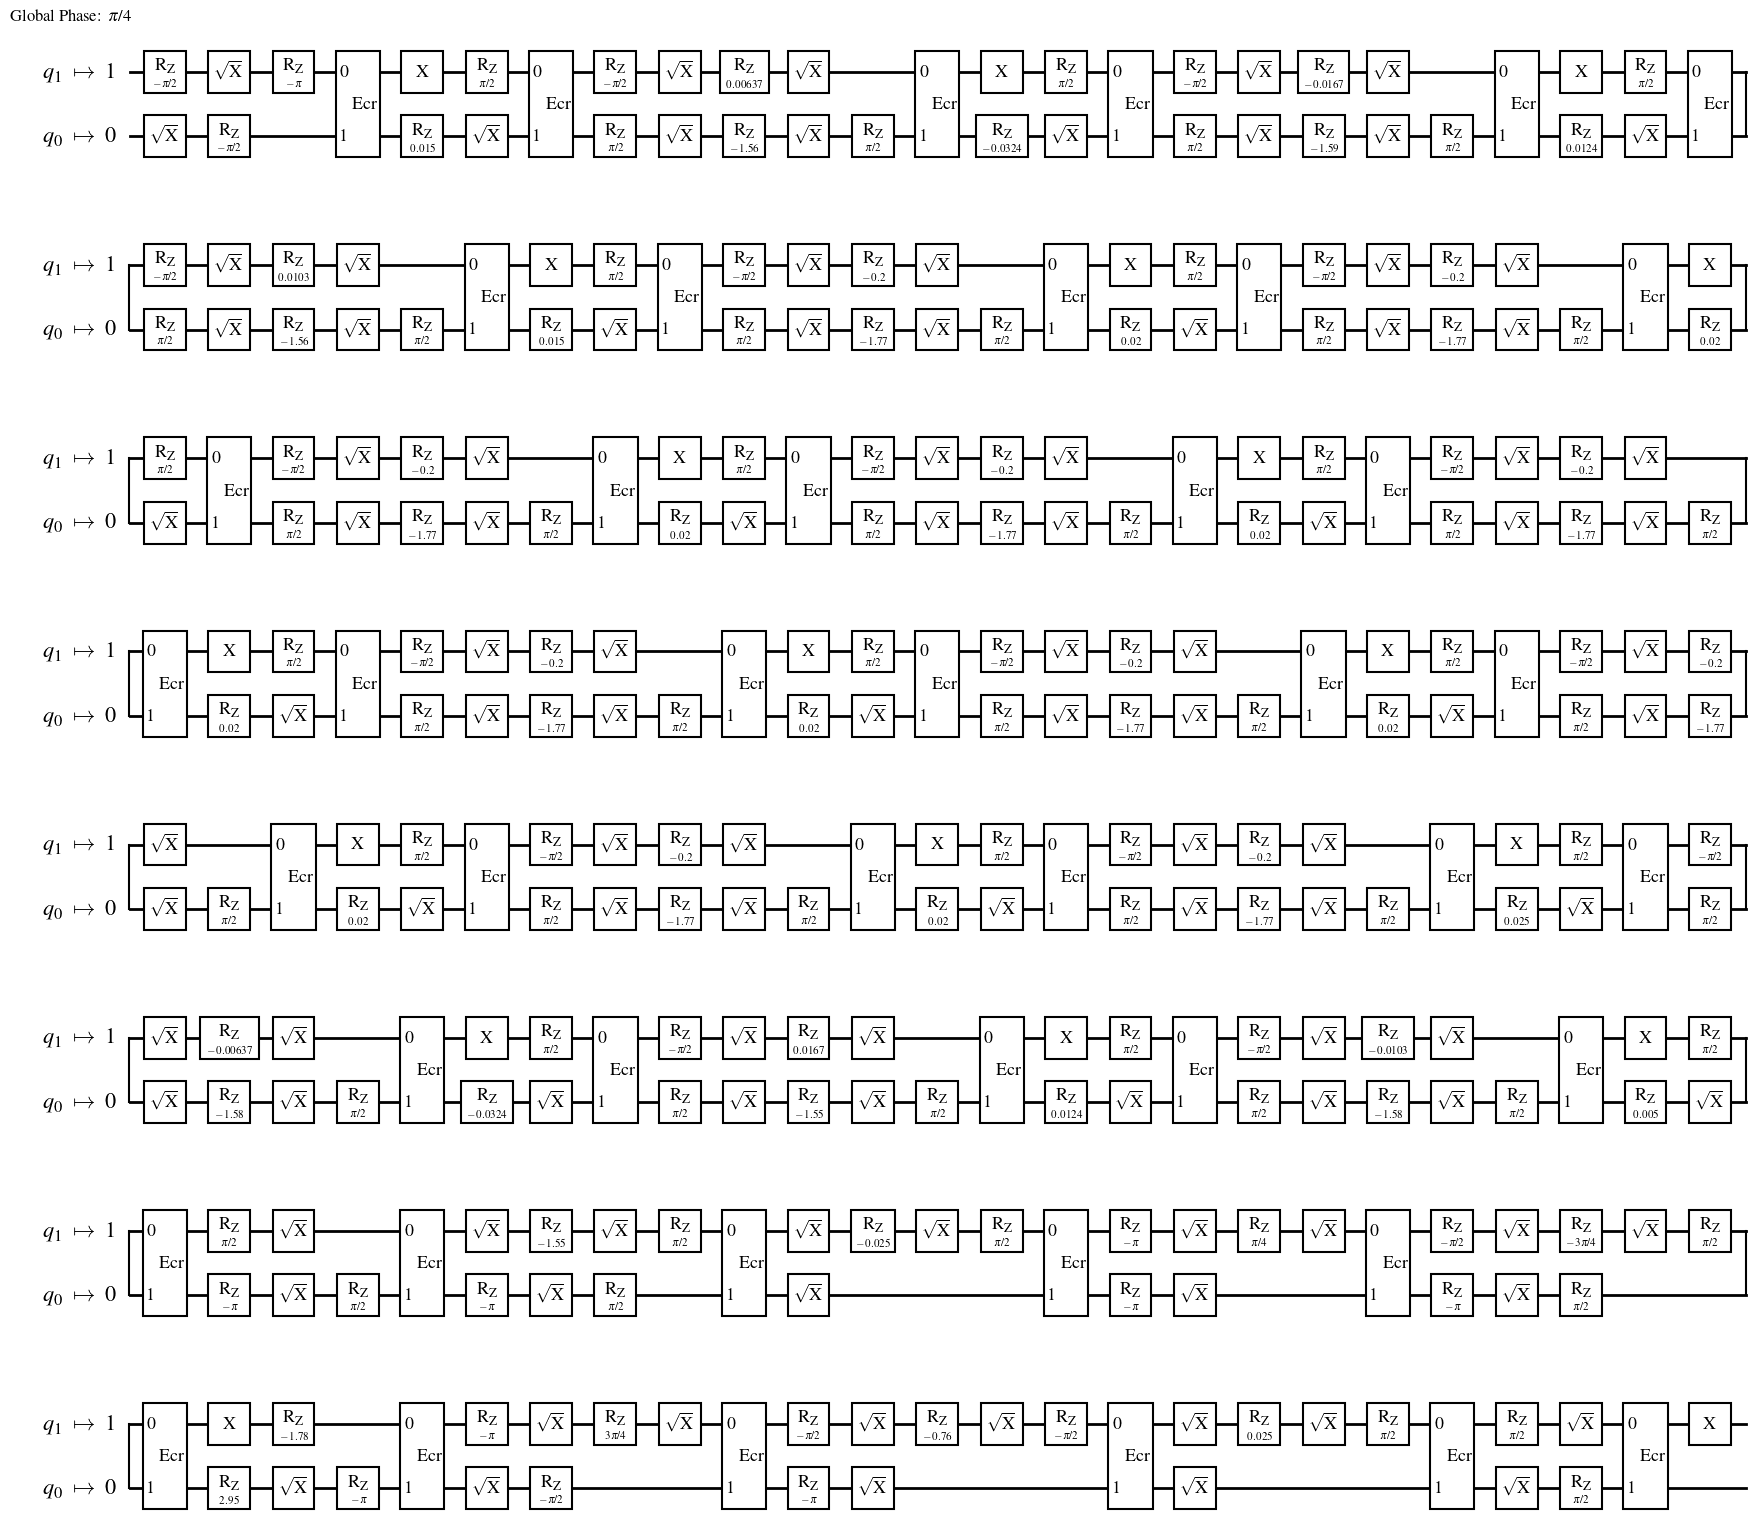

In [32]:
print(transpiled_overlap_UCPF1r10.depth())
# Draw excluding idle qubits from the diagram
transpiled_overlap_UCPF1r10.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw")

49


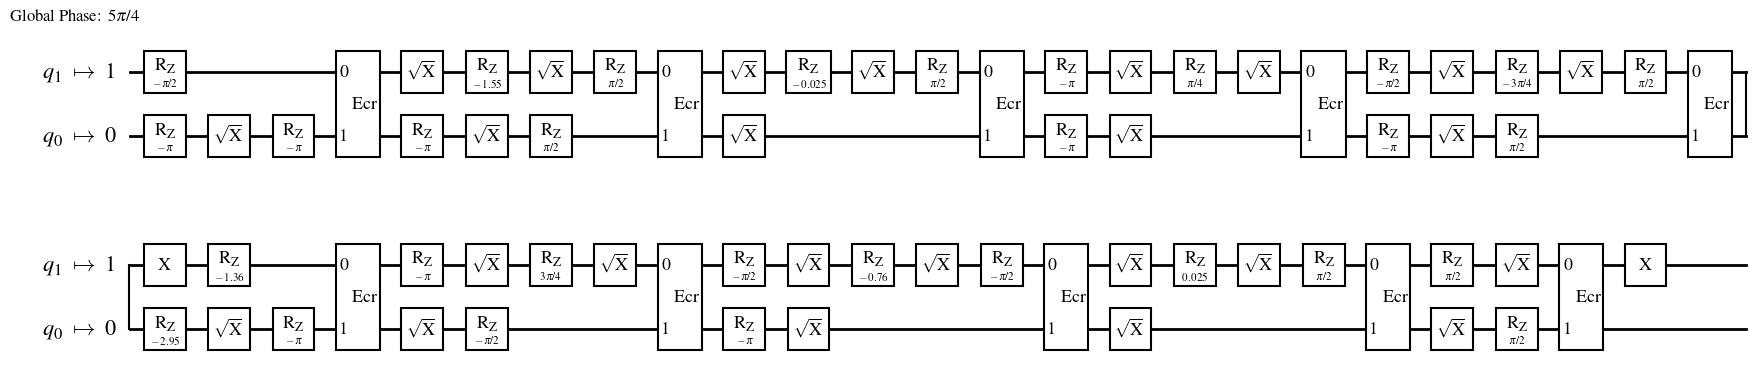

In [21]:
print(transpiled_exactU.depth())
# Draw excluding idle qubits from the diagram
transpiled_exactU.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw")

10


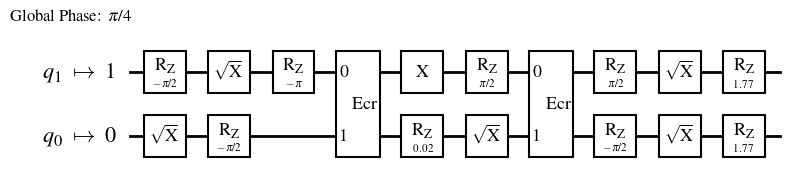

In [22]:
print(transpiled_UPF1r1.depth())
# Draw excluding idle qubits from the diagram
transpiled_UPF1r1.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw")

91


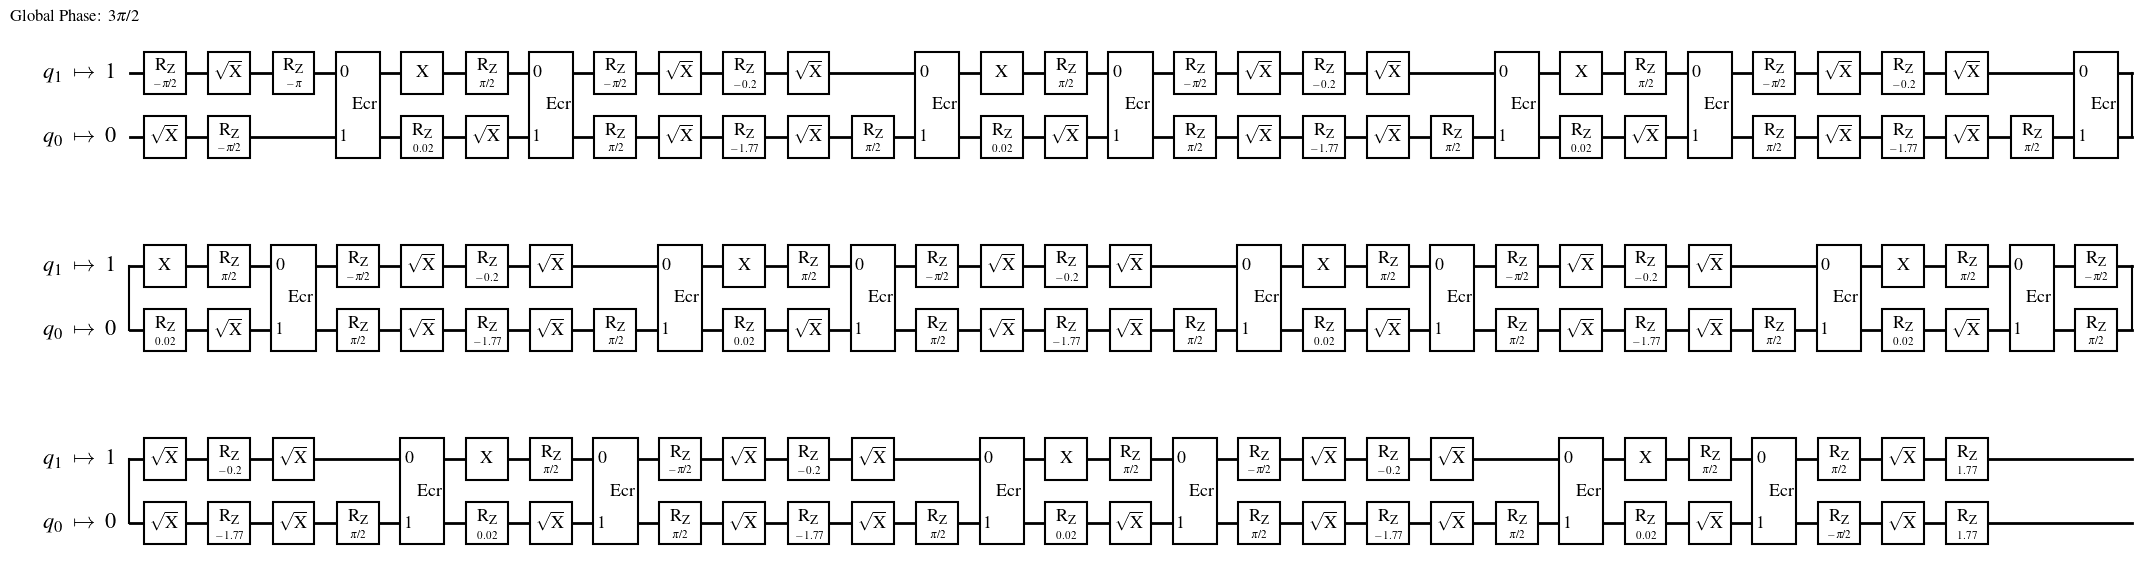

In [23]:
print(transpiled_UPF1r10.depth())
transpiled_UPF1r10.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw", fold=31)

10


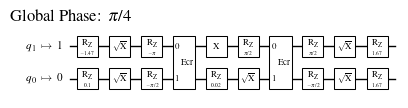

In [24]:
print(transpiled_UPF2r1.depth())
# Draw excluding idle qubits from the diagram
transpiled_UPF2r1.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw", scale=0.5)

91


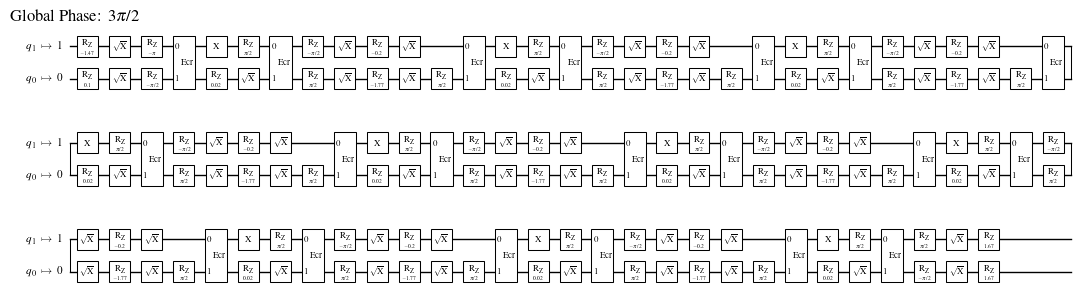

In [25]:
print(transpiled_UPF2r10.depth())
transpiled_UPF2r10.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw", scale=0.5, fold=31)

73


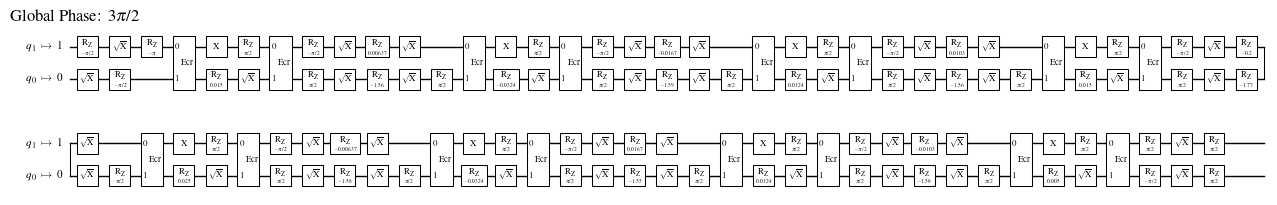

In [26]:
print(transpiled_UCPF1r1.depth())
# Draw excluding idle qubits from the diagram
transpiled_UCPF1r1.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw", scale=0.5, fold=37)

154


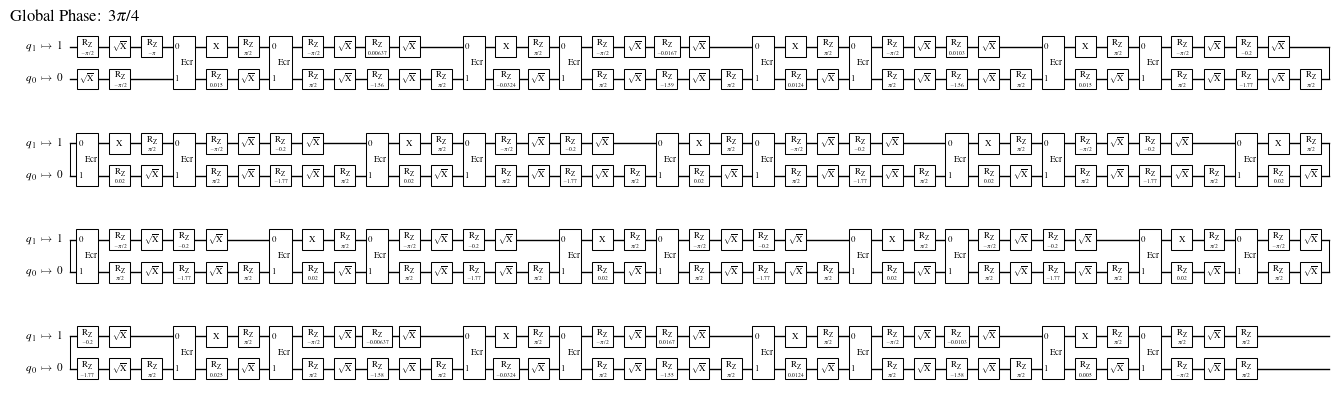

In [27]:
print(transpiled_UCPF1r10.depth())
# Draw excluding idle qubits from the diagram
transpiled_UCPF1r10.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw", scale=0.5, fold=39)

64


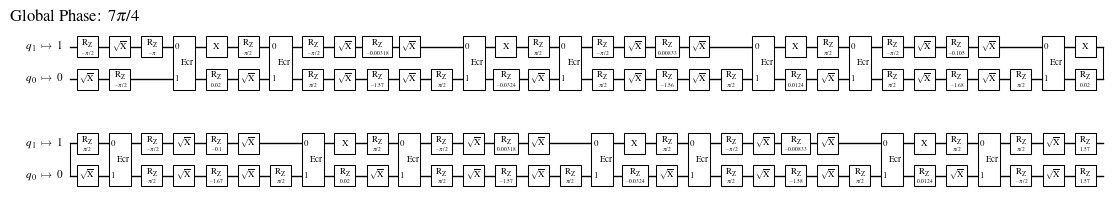

In [28]:
print(transpiled_UCPF2r1.depth())
# Draw excluding idle qubits from the diagram
transpiled_UCPF2r1.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw", scale=0.5, fold=32)

145


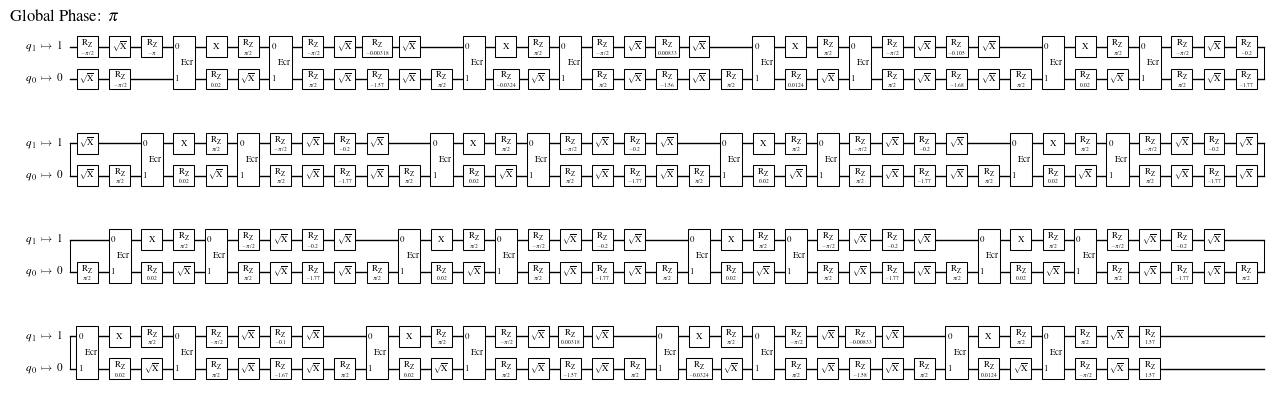

In [29]:
print(transpiled_UCPF2r10.depth())
# Draw excluding idle qubits from the diagram
transpiled_UCPF2r10.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw", scale=0.5, fold=37)

## Depth comparison for level-2 pass manager

In [29]:
service = QiskitRuntimeService()
backend = service.backend("ibm_quebec")
pm = generate_preset_pass_manager(backend=backend, seed_transpiler=seed, optimization_level=2)

In [30]:
transpiled_exactU = pm.run(exactU)

transpiled_UPF1r1 = pm.run(UPF1r1)
transpiled_UPF1r10 = pm.run(UPF1r10)

transpiled_UPF2r1 = pm.run(UPF2r1)
transpiled_UPF2r10 = pm.run(UPF2r10)

transpiled_UCPF1r1 = pm.run(UCPF1r1)
transpiled_UCPF1r10 = pm.run(UCPF1r10)

transpiled_UCPF2r1 = pm.run(UCPF2r1)
transpiled_UCPF2r10 = pm.run(UCPF2r10)


transpiled_overlap_UPF1r1 = pm.run(overlap_UPF1r1)
transpiled_overlap_UPF1r10 = pm.run(overlap_UPF1r10)

transpiled_overlap_UPF2r1 = pm.run(overlap_UPF2r1)
transpiled_overlap_UPF2r10 = pm.run(overlap_UPF2r10)


transpiled_overlap_UCPF1r1 = pm.run(overlap_UCPF1r1)
transpiled_overlap_UCPF1r10 = pm.run(overlap_UCPF1r10)

transpiled_overlap_UCPF2r1 = pm.run(overlap_UCPF2r1)
transpiled_overlap_UCPF2r10 = pm.run(overlap_UCPF2r10)

In [31]:
print(f"""
Depth for level-2 transpiled exactU: {transpiled_exactU.depth()}
Depth for level-2 transpiled UPF1r1: {transpiled_UPF1r1.depth()}
Depth for level-2 transpiled UPF1r10: {transpiled_UPF1r10.depth()}
Depth for level-2 transpiled UPF2r1: {transpiled_UPF2r1.depth()}
Depth for level-2 transpiled UPF2r10: {transpiled_UPF2r10.depth()}
Depth for level-2 transpiled UCPF1r1: {transpiled_UCPF1r1.depth()}
Depth for level-2 transpiled UCPF1r10: {transpiled_UCPF1r10.depth()}
Depth for level-2 transpiled UCPF2r1: {transpiled_UCPF2r1.depth()}
Depth for level-2 transpiled UCPF2r10: {transpiled_UCPF2r10.depth()}
"""
)

print(f"""
Overlap depth for level-2 transpiled UPF1r1: {transpiled_overlap_UPF1r1.depth()}
Overlap depth for level-2 transpiled UPF1r10: {transpiled_overlap_UPF1r10.depth()}
Overlap depth for level-2 transpiled UPF2r1: {transpiled_overlap_UPF2r1.depth()}
Overlap depth for level-2 transpiled UPF2r10: {transpiled_overlap_UPF2r10.depth()}
Overlap depth for level-2 transpiled UCPF1r1: {transpiled_overlap_UCPF1r1.depth()}
Overlap depth for level-2 transpiled UCPF1r10: {transpiled_overlap_UCPF1r10.depth()}
Overlap depth for level-2 transpiled UCPF2r1: {transpiled_overlap_UCPF2r1.depth()}
Overlap depth for level-2 transpiled UCPF2r10: {transpiled_overlap_UCPF2r10.depth()}
"""
)


Depth for level-2 transpiled exactU: 12
Depth for level-2 transpiled UPF1r1: 12
Depth for level-2 transpiled UPF1r10: 12
Depth for level-2 transpiled UPF2r1: 12
Depth for level-2 transpiled UPF2r10: 12
Depth for level-2 transpiled UCPF1r1: 12
Depth for level-2 transpiled UCPF1r10: 12
Depth for level-2 transpiled UCPF2r1: 12
Depth for level-2 transpiled UCPF2r10: 12


Overlap depth for level-2 transpiled UPF1r1: 11
Overlap depth for level-2 transpiled UPF1r10: 12
Overlap depth for level-2 transpiled UPF2r1: 19
Overlap depth for level-2 transpiled UPF2r10: 12
Overlap depth for level-2 transpiled UCPF1r1: 1
Overlap depth for level-2 transpiled UCPF1r10: 12
Overlap depth for level-2 transpiled UCPF2r1: 1
Overlap depth for level-2 transpiled UCPF2r10: 12



## Visualization for level-2 circuits

200


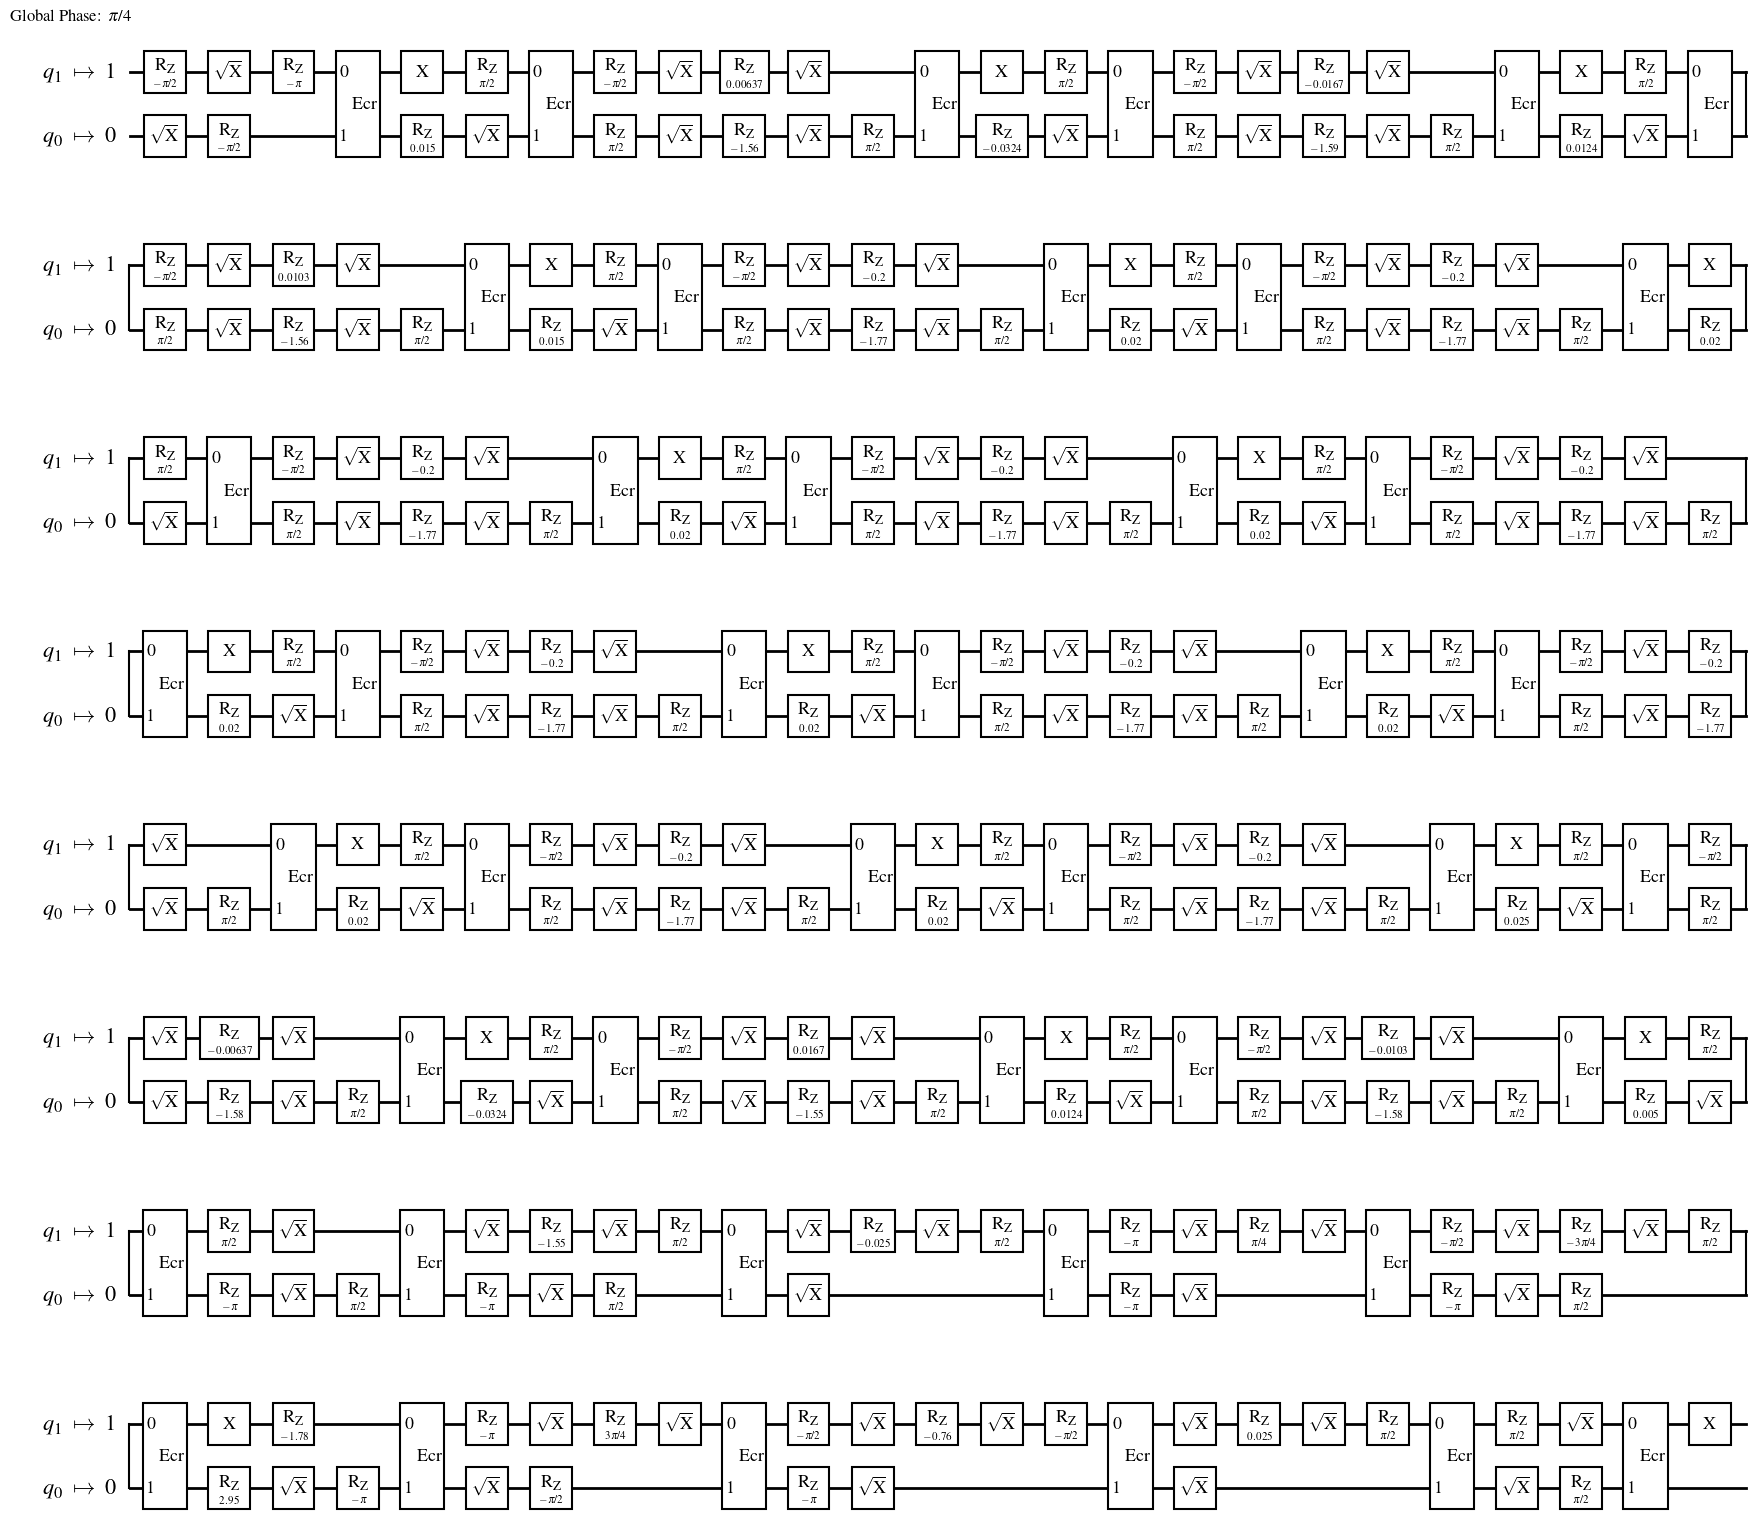

In [41]:
print(transpiled_overlap_UCPF1r10.depth())
# Draw excluding idle qubits from the diagram
transpiled_overlap_UCPF1r10.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw")

12


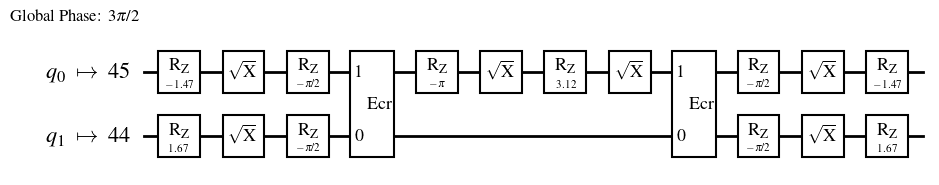

In [170]:
print(transpiled_exactU.depth())
# Draw excluding idle qubits from the diagram
transpiled_exactU.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw")

12


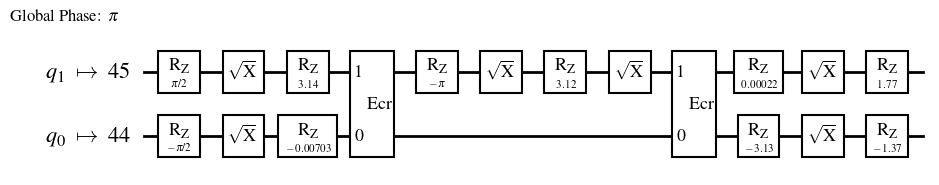

In [171]:
print(transpiled_UPF1r1.depth())
transpiled_UPF1r1.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw")

12


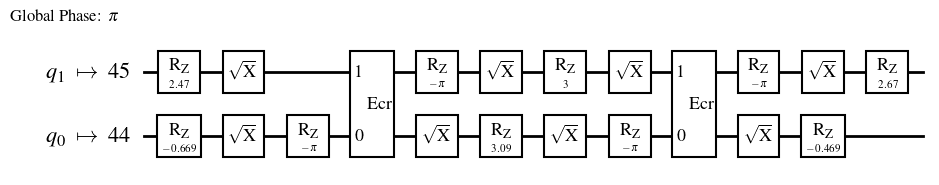

In [172]:
print(transpiled_UPF1r10.depth())
transpiled_UPF1r10.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw")

12


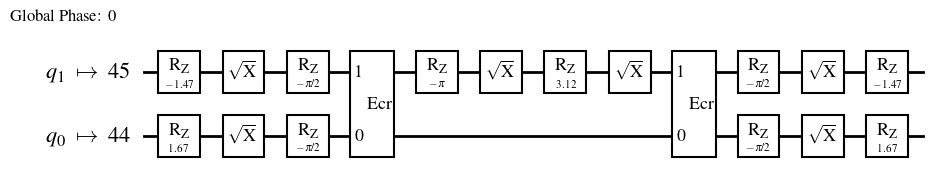

In [173]:
print(transpiled_UPF2r1.depth())
# Draw excluding idle qubits from the diagram
transpiled_UPF2r1.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw")

12


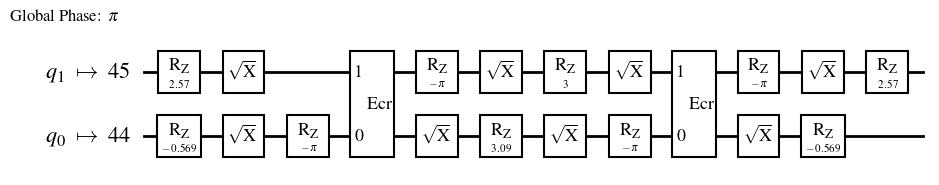

In [174]:
print(transpiled_UPF2r10.depth())
# Draw excluding idle qubits from the diagram
transpiled_UPF2r10.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw")

12


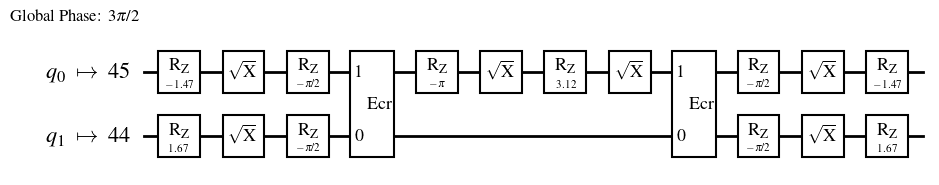

In [175]:
print(transpiled_UCPF1r1.depth())
# Draw excluding idle qubits from the diagram
transpiled_UCPF1r1.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw")

12


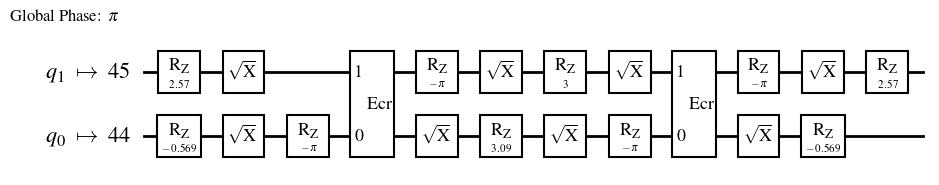

In [176]:
print(transpiled_UCPF1r10.depth())
# Draw excluding idle qubits from the diagram
transpiled_UCPF1r10.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw")

12


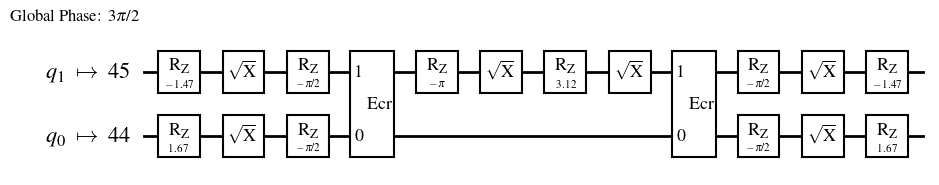

In [177]:
print(transpiled_UCPF2r1.depth())
transpiled_UCPF2r1.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw")

12


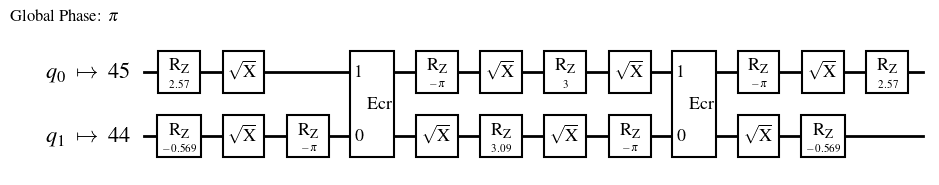

In [178]:
print(transpiled_UCPF2r10.depth())
transpiled_UCPF2r10.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw")

## Depth comparison for level-3 pass manager

In [32]:
service = QiskitRuntimeService()
backend = service.backend("ibm_quebec")
pm = generate_preset_pass_manager(backend=backend, seed_transpiler=seed, optimization_level=3)

In [33]:
transpiled_exactU = pm.run(exactU)

transpiled_UPF1r1 = pm.run(UPF1r1)
transpiled_UPF1r10 = pm.run(UPF1r10)

transpiled_UPF2r1 = pm.run(UPF2r1)
transpiled_UPF2r10 = pm.run(UPF2r10)

transpiled_UCPF1r1 = pm.run(UCPF1r1)
transpiled_UCPF1r10 = pm.run(UCPF1r10)

transpiled_UCPF2r1 = pm.run(UCPF2r1)
transpiled_UCPF2r10 = pm.run(UCPF2r10)


transpiled_overlap_UPF1r1 = pm.run(overlap_UPF1r1)
transpiled_overlap_UPF1r10 = pm.run(overlap_UPF1r10)

transpiled_overlap_UPF2r1 = pm.run(overlap_UPF2r1)
transpiled_overlap_UPF2r10 = pm.run(overlap_UPF2r10)


transpiled_overlap_UCPF1r1 = pm.run(overlap_UCPF1r1)
transpiled_overlap_UCPF1r10 = pm.run(overlap_UCPF1r10)

transpiled_overlap_UCPF2r1 = pm.run(overlap_UCPF2r1)
transpiled_overlap_UCPF2r10 = pm.run(overlap_UCPF2r10)

In [34]:
print(f"""
Depth for level-3 transpiled exactU: {transpiled_exactU.depth()}
Depth for level-3 transpiled UPF1r1: {transpiled_UPF1r1.depth()}
Depth for level-3 transpiled UPF1r10: {transpiled_UPF1r10.depth()}
Depth for level-3 transpiled UPF2r1: {transpiled_UPF2r1.depth()}
Depth for level-3 transpiled UPF2r10: {transpiled_UPF2r10.depth()}
Depth for level-3 transpiled UCPF1r1: {transpiled_UCPF1r1.depth()}
Depth for level-3 transpiled UCPF1r10: {transpiled_UCPF1r10.depth()}
Depth for level-3 transpiled UCPF2r1: {transpiled_UCPF2r1.depth()}
Depth for level-3 transpiled UCPF2r10: {transpiled_UCPF2r10.depth()}
"""
)
print(f"""
Overlap depth for level-3 transpiled UPF1r1: {transpiled_overlap_UPF1r1.depth()}
Overlap depth for level-3 transpiled UPF1r10: {transpiled_overlap_UPF1r10.depth()}
Overlap depth for level-3 transpiled UPF2r1: {transpiled_overlap_UPF2r1.depth()}
Overlap depth for level-3 transpiled UPF2r10: {transpiled_overlap_UPF2r10.depth()}
Overlap depth for level-3 transpiled UCPF1r1: {transpiled_overlap_UCPF1r1.depth()}
Overlap depth for level-3 transpiled UCPF1r10: {transpiled_overlap_UCPF1r10.depth()}
Overlap depth for level-3 transpiled UCPF2r1: {transpiled_overlap_UCPF2r1.depth()}
Overlap depth for level-3 transpiled UCPF2r10: {transpiled_overlap_UCPF2r10.depth()}
"""
)


Depth for level-3 transpiled exactU: 12
Depth for level-3 transpiled UPF1r1: 12
Depth for level-3 transpiled UPF1r10: 12
Depth for level-3 transpiled UPF2r1: 12
Depth for level-3 transpiled UPF2r10: 12
Depth for level-3 transpiled UCPF1r1: 12
Depth for level-3 transpiled UCPF1r10: 12
Depth for level-3 transpiled UCPF2r1: 12
Depth for level-3 transpiled UCPF2r10: 12


Overlap depth for level-3 transpiled UPF1r1: 11
Overlap depth for level-3 transpiled UPF1r10: 12
Overlap depth for level-3 transpiled UPF2r1: 19
Overlap depth for level-3 transpiled UPF2r10: 12
Overlap depth for level-3 transpiled UCPF1r1: 1
Overlap depth for level-3 transpiled UCPF1r10: 12
Overlap depth for level-3 transpiled UCPF2r1: 1
Overlap depth for level-3 transpiled UCPF2r10: 12



## Visualization for level-3 circuits

In [ ]:
print(transpiled_overlap_UCPF1r10.depth())
# Draw excluding idle qubits from the diagram
transpiled_overlap_UCPF1r10.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw")

12


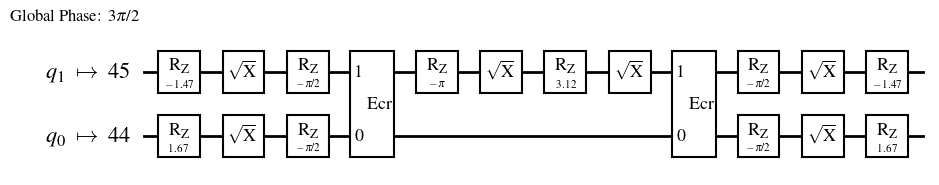

In [181]:
print(transpiled_exactU.depth())
# Draw excluding idle qubits from the diagram
transpiled_exactU.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw")

12


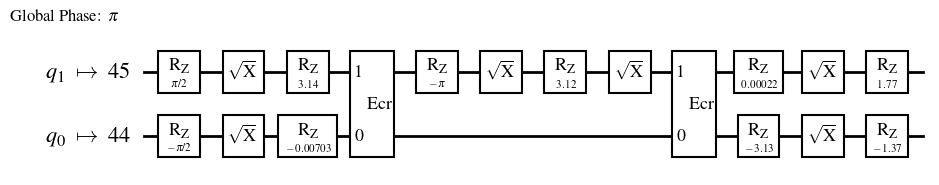

In [182]:
print(transpiled_UPF1r1.depth())
transpiled_UPF1r1.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw")

12


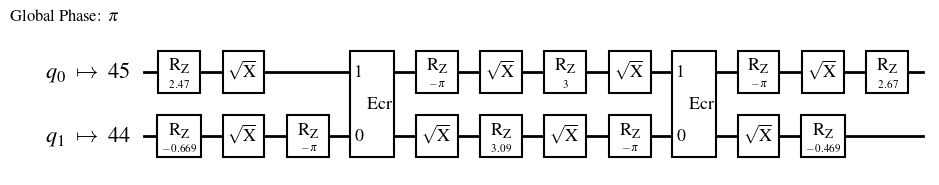

In [183]:
print(transpiled_UPF1r10.depth())
transpiled_UPF1r10.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw", scale=1)

12


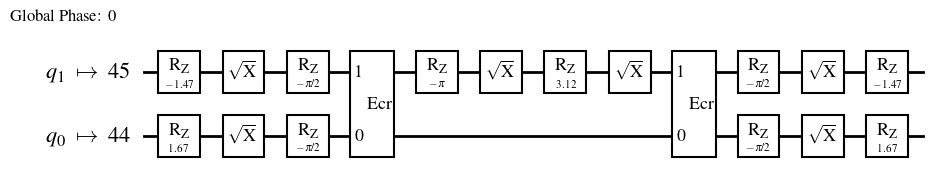

In [184]:
print(transpiled_UPF2r1.depth())
# Draw excluding idle qubits from the diagram
transpiled_UPF2r1.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw")

12


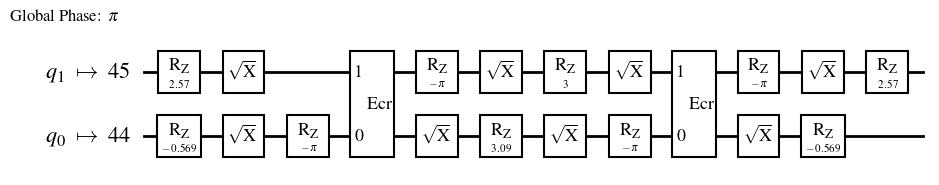

In [185]:
print(transpiled_UPF2r10.depth())
# Draw excluding idle qubits from the diagram
transpiled_UPF2r10.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw")

12


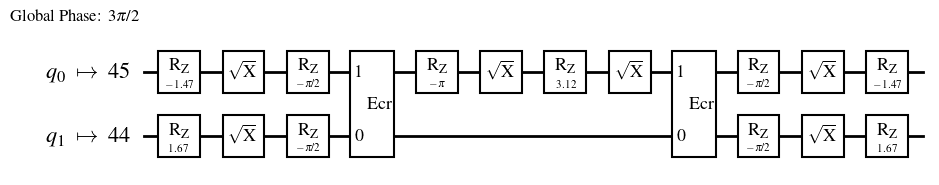

In [186]:
print(transpiled_UCPF1r1.depth())
# Draw excluding idle qubits from the diagram
transpiled_UCPF1r1.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw")

12


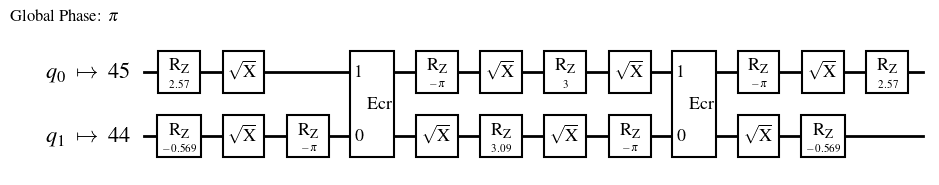

In [187]:
print(transpiled_UCPF1r10.depth())
# Draw excluding idle qubits from the diagram
transpiled_UCPF1r10.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw")

12


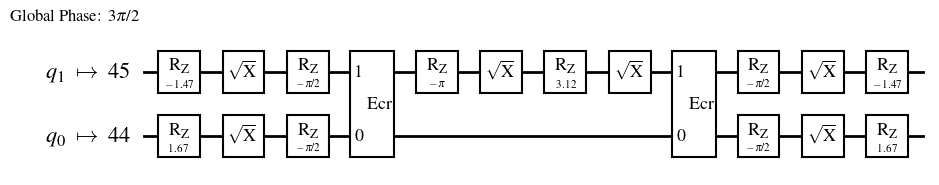

In [188]:
print(transpiled_UCPF2r1.depth())
# Draw excluding idle qubits from the diagram
transpiled_UCPF2r1.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw")

12


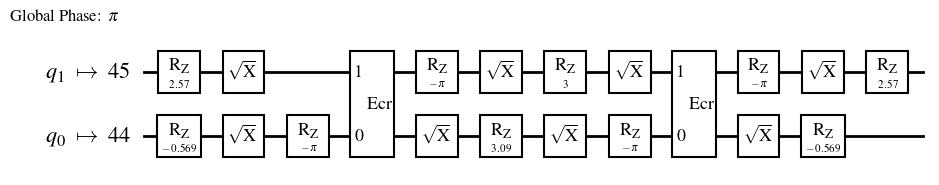

In [189]:
print(transpiled_UCPF2r10.depth())
# Draw excluding idle qubits from the diagram
transpiled_UCPF2r10.draw(output="mpl", idle_wires=False, reverse_bits=True, style="bw")